In [1]:
# import libraries
import pandas as pd
import numpy as np

import matplotlib, matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rowdata_df = pd.read_csv("../pharmacy_tx.csv")

In [45]:
print(rowdata_df.shape)
rowdata_df.head(100)

(13910244, 9)


,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
95,2022-01-02,Pharmacy #26,Q85.91,generic rulfalol,322463,T52GV,EVD4X5,False,4.63
96,2022-01-02,Pharmacy #15,I68.27,branded prazinib,322463,3O71UTS,NaN,False,12.22
97,2022-01-02,Pharmacy #1,I68.27,branded mule,96934,9D24,VC81HUO7ZD,True,0.00
98,2022-01-02,Pharmacy #49,U60.52,generic foxivelule,322463,NaN,HO8HUGL,False,5.95


In [4]:
rowdata_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13910244 entries, 0 to 13910243
Data columns (total 9 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   drug         object 
 4   bin          int64  
 5   pcn          object 
 6   group        object 
 7   rejected     bool   
 8   patient_pay  float64
dtypes: bool(1), float64(1), int64(1), object(6)
memory usage: 862.3+ MB


In [5]:
#rowdata_dropna_df=rowdata_df.dropna()
print(rowdata_df.shape)

(13910244, 9)


In [6]:
duplicate = rowdata_df[rowdata_df.duplicated(["pharmacy","bin"])]

In [7]:
duplicate.head(6)
print(duplicate.shape)

(13909548, 9)


In [8]:
# drop duplicates if all columns matched
dropduplicate_df= rowdata_df.drop_duplicates()

In [9]:
dropduplicate_df

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
0,2022-01-02,Pharmacy #6,G99.93,branded tanoclolol,725700,1UQC,NaN,False,13.39
1,2022-01-02,Pharmacy #42,U60.52,branded oxasoted,664344,NaN,52H8KH0F83K,False,7.02
2,2022-01-02,Pharmacy #37,Q85.91,branded cupitelol,725700,1UQC,NaN,False,13.39
3,2022-01-02,Pharmacy #30,U60.52,generic oxasoted,571569,KB38N,6BYJBW,False,10.84
4,2022-01-02,Pharmacy #18,N55.01,branded mamate,664344,NaN,ZX2QUWR,False,47.00
...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,branded colifunene,322463,NaN,HO8HUGL,True,0.00
13910240,2022-12-30,Pharmacy #45,N59.44,generic tafistitrisin,664344,NaN,TFZOR5R49,False,6.28
13910241,2022-12-30,Pharmacy #54,W50.87,generic tanoclolol,691847,N098KI,6SP1DG,False,6.94
13910242,2022-12-30,Pharmacy #0,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93


In [10]:
dropduplicate_df.groupby(["rejected"]).count()

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,patient_pay
rejected,,,,,,,,
False,11512008,11512008,11512008,11512008,11512008,8581198,8268435,11512008
True,1049837,1049837,1049837,1049837,1049837,757422,769773,1049837


In [11]:
dropduplicate_df[['brand', 'drug_name']] =dropduplicate_df.drug.str.split(expand=True)

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:3188: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [12]:
dropduplicate_df.drop(["drug"], axis =1, inplace =True)

/Users/dilhumarablat/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/pandas/core/frame.py:4312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
dropduplicate_df.head()
print(dropduplicate_df.shape)

(12561845, 10)


In [14]:
dropduplicate_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12561845 entries, 0 to 13910243
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   tx_date      object 
 1   pharmacy     object 
 2   diagnosis    object 
 3   bin          int64  
 4   pcn          object 
 5   group        object 
 6   rejected     bool   
 7   patient_pay  float64
 8   brand        object 
 9   drug_name    object 
dtypes: bool(1), float64(1), int64(1), object(7)
memory usage: 970.4+ MB


In [15]:
# removing the claims in Janurary
NoJan_df = dropduplicate_df[dropduplicate_df['tx_date'] >= "2022-02-01"]

In [16]:
print(NoJan_df.shape)
NoJan_df.head()

(11629192, 10)


,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,False,10.72,generic,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,False,18.16,branded,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,False,8.73,generic,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,False,72.22,branded,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,False,12.22,generic,oxasoted


In [17]:
NoJan_df.columns.tolist()

['tx_date',
 'pharmacy',
 'diagnosis',
 'bin',
 'pcn',
 'group',
 'rejected',
 'patient_pay',
 'brand',
 'drug_name']

In [18]:
# getting columns contains strings
df_str_columns=NoJan_df.select_dtypes(include=['object'])
for col in df_str_columns.columns:
    print(col)

tx_date
pharmacy
diagnosis
pcn
group
brand
drug_name


In [19]:
# Initial imports
from collections import Counter
from pathlib import Path
import plotly.express as px
# Import dependencies
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from seaborn import set_style
set_style("whitegrid")

In [20]:
# using lableEncoder to assign brand and rejected into numerical values 
le = LabelEncoder()
NoJan_df1 = NoJan_df.copy()
NoJan_df1['brand'] = le.fit_transform(NoJan_df1['brand'])
NoJan_df1['rejected'] = le.fit_transform(NoJan_df1['rejected'])

In [21]:
NoJan_df1.head()

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,0,72.22,0,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted


In [22]:
# Create our features and get dummies
X = pd.get_dummies(NoJan_df1, columns= ["pharmacy", "diagnosis", "pcn","group", 
                                 "drug_name"]).drop(["rejected","tx_date", "patient_pay"],axis=1)

# Create our target
y = NoJan_df1['rejected']
X.head()

,bin,brand,pharmacy_Pharmacy #0,pharmacy_Pharmacy #1,pharmacy_Pharmacy #10,pharmacy_Pharmacy #11,pharmacy_Pharmacy #12,pharmacy_Pharmacy #13,pharmacy_Pharmacy #14,pharmacy_Pharmacy #15,...,drug_name_tanoclolol,drug_name_thiostasteglume,drug_name_tocilic,drug_name_tocrocin,drug_name_todiadianic,drug_name_tovane,drug_name_tricatripride,drug_name_tugesutin,drug_name_vivafastat,drug_name_vocopirin
1019813,691847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019814,322463,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1019815,691847,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019816,160389,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1019817,322463,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
NoJan_df1

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib
1019814,2022-02-01,Pharmacy #7,K32.86,322463,3Y5ZW0,NaN,0,18.16,0,tanoclolol
1019815,2022-02-01,Pharmacy #42,G99.93,691847,2TIC,XK8RM5E75ZW,0,8.73,1,simarol
1019816,2022-02-01,Pharmacy #24,D13.25,160389,RB7UU,RS5RB3YA,0,72.22,0,plazamiglutic
1019817,2022-02-01,Pharmacy #12,U60.52,322463,3O71UTS,NaN,0,12.22,1,oxasoted
...,...,...,...,...,...,...,...,...,...,...
13910239,2022-12-30,Pharmacy #42,U27.71,322463,NaN,HO8HUGL,1,0.00,0,colifunene
13910240,2022-12-30,Pharmacy #45,N59.44,664344,NaN,TFZOR5R49,0,6.28,1,tafistitrisin
13910241,2022-12-30,Pharmacy #54,W50.87,691847,N098KI,6SP1DG,0,6.94,1,tanoclolol
13910242,2022-12-30,Pharmacy #0,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib


In [24]:
NoJan_df1.describe()

,bin,rejected,patient_pay,brand
count,1.162919e+07,1.162919e+07,1.162919e+07,1.162919e+07
mean,5.756403e+05,8.365620e-02,2.440255e+01,3.691248e-01
std,2.037136e+05,2.768715e-01,4.051599e+01,4.825678e-01
min,9.693400e+04,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.224630e+05,0.000000e+00,8.510000e+00,0.000000e+00
50%,6.643440e+05,0.000000e+00,1.339000e+01,0.000000e+00
75%,7.183500e+05,0.000000e+00,1.891000e+01,1.000000e+00
max,9.569710e+05,1.000000e+00,5.579300e+02,1.000000e+00


In [25]:
# Check the balance of our target values
y.value_counts()

0    10656338
1      972854
Name: rejected, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,  train_size=0.25)

In [27]:
# Check balances
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 2664575, 1: 242723})
Counter({0: 7991763, 1: 730131})


In [28]:
# Resample the training data with the BalancedRandomForestClassifier
# get time for execustion
from datetime import datetime
start_time = datetime.now()

from imblearn.ensemble import BalancedRandomForestClassifier
BalancedRFC_model = BalancedRandomForestClassifier(n_estimators=100, random_state=1)
BalancedRFC_model= BalancedRFC_model.fit(X_train, y_train)

end_time = datetime.now()
print('Duration: {}'.format(end_time - start_time))

Duration: 0:07:53.948325


In [29]:
# Calculated the balanced accuracy score
y_pred = BalancedRFC_model.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.871730584502677

In [30]:
# Display the confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [31]:
# Create a DataFrame from the confusion matrix.
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"])

cm_df

,Predicted 0,Predicted 1
Actual 0,6097957,1893806
Actual 1,14288,715843


In [32]:
# Print the imbalanced classification report
from imblearn.metrics import classification_report_imbalanced
print(classification_report_imbalanced(y_test, y_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.76      0.98      0.86      0.86      0.73   7991763
          1       0.27      0.98      0.76      0.43      0.86      0.76    730131

avg / total       0.94      0.78      0.96      0.83      0.86      0.73   8721894



In [33]:
# List the features 
features = BalancedRFC_model.feature_importances_
features

array([2.10278242e-02, 1.69840674e-01, 2.55730202e-03, 2.62618994e-03,
       2.50828067e-03, 2.60761173e-03, 2.54468082e-03, 2.44128508e-03,
       2.52323043e-03, 2.58154121e-03, 2.61899916e-03, 2.56655147e-03,
       2.53271153e-03, 2.55708933e-03, 2.51624378e-03, 2.55924141e-03,
       2.40027848e-03, 2.50771229e-03, 2.46799093e-03, 2.63803445e-03,
       2.48193265e-03, 2.49516644e-03, 2.57904584e-03, 2.58012624e-03,
       2.55836416e-03, 2.47227357e-03, 2.54816232e-03, 2.51497320e-03,
       2.48415362e-03, 2.59284396e-03, 2.41885485e-03, 2.54043184e-03,
       2.62329787e-03, 2.47571271e-03, 2.39391913e-03, 2.63973497e-03,
       2.50666513e-03, 2.57561381e-03, 2.54558206e-03, 2.55659814e-03,
       2.55593397e-03, 2.72022907e-03, 2.55299873e-03, 2.55720161e-03,
       2.54901147e-03, 2.59815853e-03, 2.55109834e-03, 2.63274441e-03,
       2.54134392e-03, 2.45088225e-03, 2.67888460e-03, 2.60211854e-03,
       2.53576910e-03, 2.60276915e-03, 2.47017625e-03, 2.40399637e-03,
      

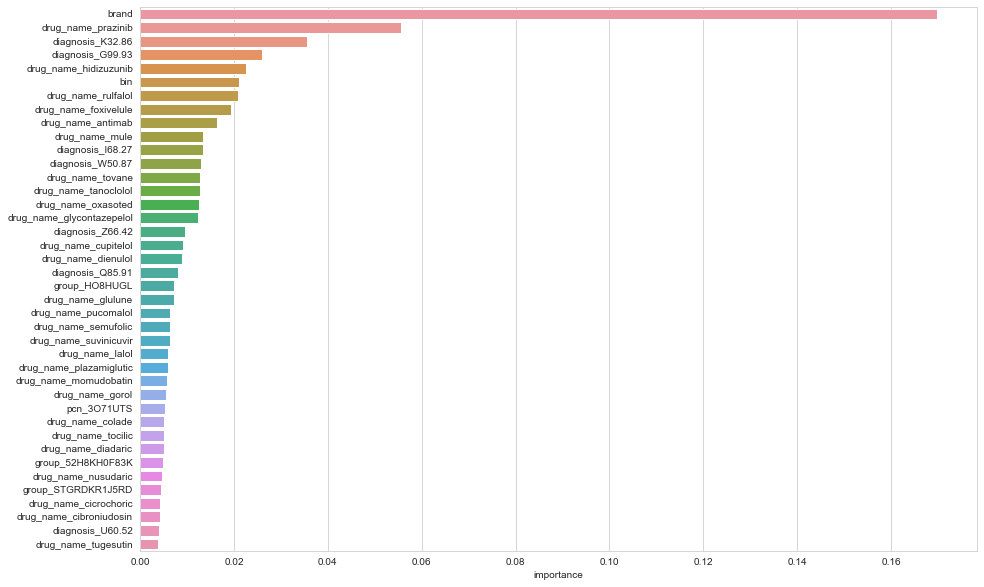

<Figure size 432x288 with 0 Axes>

In [35]:
importances = pd.DataFrame(np.zeros((X_train.shape[1], 1)), columns=["importance"], index=X_train.columns)

importances.iloc[:,0] = BalancedRFC_model.feature_importances_

importances = importances.sort_values(by="importance", ascending=False)[:40]

plt.figure(figsize=(15, 10))
sns.barplot(x="importance", y=importances.index, data=importances)
plt.show()
plt.savefig("featureimportance.png") #save as png

### try to see important features in the actual dataset 

In [36]:
# branded 0, generic 1; rejected 1, accepted 0
NoJan_df1.groupby(["brand", "rejected"]).count()

tx_date  pharmacy  diagnosis      bin      pcn    group  \
brand rejected                                                            
0     0         6385347   6385347    6385347  6385347  4764726  4584636   
      1          951222    951222     951222   951222   686963   696490   
1     0         4270991   4270991    4270991  4270991  3178495  3070234   
      1           21632     21632      21632    21632    14876    17047   

                patient_pay  drug_name  
brand rejected                          
0     0             6385347    6385347  
      1              951222     951222  
1     0             4270991    4270991  
      1               21632      21632

#### as we suspected more branded drugs were rejected as compared to generic ones

In [61]:
prazinib_df=NoJan_df1.loc[NoJan_df1["drug_name"] == "prazinib"]
prazinib_df.head(10)

,tx_date,pharmacy,diagnosis,bin,pcn,group,rejected,patient_pay,brand,drug_name
1019813,2022-02-01,Pharmacy #54,G51.87,691847,XH4T3,GOM8K0,0,10.72,1,prazinib
1019846,2022-02-01,Pharmacy #11,I68.27,664344,NaN,STGRDKR1J5RD,0,11.74,0,prazinib
1019854,2022-02-01,Pharmacy #30,I68.27,664344,DY4B,NaN,0,17.11,0,prazinib
1019873,2022-02-01,Pharmacy #52,I68.27,96934,S76J7V6,NaN,0,13.93,0,prazinib
1019882,2022-02-01,Pharmacy #17,I68.27,664344,NaN,52H8KH0F83K,0,10.63,1,prazinib
1019893,2022-02-01,Pharmacy #56,I68.27,571569,NaN,NaN,0,10.84,1,prazinib
1019931,2022-02-01,Pharmacy #21,I68.27,96934,S76J7V6,NaN,0,10.44,1,prazinib
1019938,2022-02-01,Pharmacy #7,G51.87,691847,XH4T3,GOM8K0,0,15.55,0,prazinib
1019945,2022-02-01,Pharmacy #9,I68.27,322463,T52GV,EVD4X5,0,10.72,1,prazinib
1019967,2022-02-01,Pharmacy #27,I68.27,539437,CG3ZWQ,NaN,0,7.27,0,prazinib


##### interesting that same drug such as prazinib was classified as generic and branded, however, their patient payment were comparable. 

In [62]:
prazinib_df.groupby(["brand", "rejected"]).count()

,,tx_date,pharmacy,diagnosis,bin,pcn,group,patient_pay,drug_name
brand,rejected,,,,,,,,
0,0,526395,526395,526395,526395,397781,380168,526395,526395
1,0,535607,535607,535607,535607,403978,386698,535607,535607


In [51]:
rowdata_df.loc[rowdata_df["drug"] == "branded prazinib"]

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
9,2022-01-02,Pharmacy #28,I68.27,branded prazinib,664344,CS8580,NaN,False,11.74
45,2022-01-02,Pharmacy #5,G51.87,branded prazinib,664344,BIZF,QK6BI1N61,False,11.62
86,2022-01-02,Pharmacy #38,I68.27,branded prazinib,725700,327CKV,IOEAN1DWVV3Y,False,11.40
96,2022-01-02,Pharmacy #15,I68.27,branded prazinib,322463,3O71UTS,NaN,False,12.22
102,2022-01-02,Pharmacy #23,I68.27,branded prazinib,96934,S76J7V6,NaN,False,13.93
...,...,...,...,...,...,...,...,...,...
13910179,2022-12-30,Pharmacy #52,I68.27,branded prazinib,725700,1UQC,NaN,False,13.39
13910204,2022-12-30,Pharmacy #57,I68.27,branded prazinib,691847,NC7EN,NaN,False,17.91
13910207,2022-12-30,Pharmacy #55,I68.27,branded prazinib,757349,RM0HB,SJVO3GXUURRGO,False,10.86
13910230,2022-12-30,Pharmacy #18,I68.27,branded prazinib,322463,3O71UTS,NaN,False,12.22


In [52]:
rowdata_df.loc[rowdata_df["drug"] == "generic prazinib"]

,tx_date,pharmacy,diagnosis,drug,bin,pcn,group,rejected,patient_pay
14,2022-01-02,Pharmacy #24,I68.27,generic prazinib,691847,NC7EN,NaN,False,10.72
21,2022-01-02,Pharmacy #22,G51.87,generic prazinib,691847,ZQPX,KZWQDIHCLLHD1,False,10.72
27,2022-01-02,Pharmacy #54,I68.27,generic prazinib,725700,327CKV,IOEAN1DWVV3Y,False,10.62
104,2022-01-02,Pharmacy #0,I68.27,generic prazinib,718350,J5DT8,IX6P0,False,10.59
105,2022-01-02,Pharmacy #30,I68.27,generic prazinib,664344,NaN,ZX2QUWR,False,13.33
...,...,...,...,...,...,...,...,...,...
13910178,2022-12-30,Pharmacy #8,S15.62,generic prazinib,757349,MSCXSG,DGLGRYP,False,10.63
13910182,2022-12-30,Pharmacy #6,I68.27,generic prazinib,322463,NaN,HO8HUGL,False,10.12
13910184,2022-12-30,Pharmacy #32,G51.87,generic prazinib,571569,KB38N,6BYJBW,False,10.84
13910211,2022-12-30,Pharmacy #16,I68.27,generic prazinib,571569,KB38N,6BYJBW,False,10.84


In [56]:
NoJan_df1.groupby(["bin", "rejected"]).count()

tx_date  pharmacy  diagnosis      pcn    group  patient_pay  \
bin    rejected                                                                
96934  0          640111    640111     640111   640111    75192       640111   
       1           60038     60038      60038    60038     9278        60038   
160389 0          204641    204641     204641   204641   204641       204641   
       1           23255     23255      23255    23255    23255        23255   
322463 0         1878945   1878945    1878945  1127791  1236430      1878945   
       1          192316    192316     192316    97860   139807       192316   
539437 0          406455    406455     406455    62263   384984       406455   
       1           31471     31471      31471     4598    29890        31471   
571569 0          604343    604343     604343   531913   542111       604343   
       1           45423     45423      45423    40397    41112        45423   
664344 0         3032414   3032414    3032414  1754081  2325716      3032414   
       1          277270    277270     277270   155742   216977       277270   
691847 0         1055787   1055787    1055787   967504   694070      1055787   
       1           95671     95671      95671    87822    63975        95671   
718350 0          206500    206500     206500   206500   206500       206500   
       1           17014     17014      17014    17014    17014        17014   
725700 0         1539833   1539833    1539833  1435759  1039232      1539833   
       1          135218    135218     135218   125244    90496       135218   
756120 0          141315    141315     141315   141315        0       141315   
       1           13445     13445      13445    13445        0        13445   
757349 0          730133    730133     730133   655482   730133       730133   
       1           60275     60275      60275    54966    60275        60275   
956971 0          215861    215861     215861   215861   215861       215861   
       1           21458     21458      21458    21458    21458        21458   

                   brand  drug_name  
bin    rejected                      
96934  0          640111     640111  
       1           60038      60038  
160389 0          204641     204641  
       1           23255      23255  
322463 0         1878945    1878945  
       1          192316     192316  
539437 0          406455     406455  
       1           31471      31471  
571569 0          604343     604343  
       1           45423      45423  
664344 0         3032414    3032414  
       1          277270     277270  
691847 0         1055787    1055787  
       1           95671      95671  
718350 0          206500     206500  
       1           17014      17014  
725700 0         1539833    1539833  
       1          135218     135218  
756120 0          141315     141315  
       1           13445      13445  
757349 0          730133     730133  
       1           60275      60275  
956971 0          215861     215861  
       1           21458      21458